Hickmann, Manuel Lautaro  
lautaro.hickmann@uni-ulm.de  
MatNr: 953591

# Implementation of: Group Normalization

In this notebook figure $1$ of [Group Normalization Wu & HE 2020](https://doi.org/10.1007/s11263-019-01198-w) is reproduced using a smaller network on the CIFAR-10 dataset.

![](./Images/fig1.png)



For the reproduction following ResNet20 was implemented as described in [Group Normalization (Wu & He 2020)](https://doi.org/10.1007/s11263-019-01198-w) and [Deep Residual Learning for Image Recognition (He et. al. 2020)](https://arxiv.org/abs/1512.03385) with some modification. 

The structure of the networks is as follows:


![](./Images/ResNet20_complete.png)

Following modification to the training process proposed in the papers was used, since they showed the best results after testing multiple configurations:
- The data augmentation was implemented, but instead of training for 100 epochs, the data augmentation was modified so that the dataset was made 4 times bigger. And therefore it was only trained for 25 epochs (30 were lastly used since it showed better results with the learning decay.)
- The adam optimizer was used instead of SGD since it showed better results.
- No weight decay was used since without it the results were better.
- The learning rate rule of Group Norm was not used but instead $lr=0.001$ was used.
- The group number was reduced from $32$ to $8$. Following the idea that ResNet50 has at least $64$ filters and ResNet20 at least$16$, and the group number is half the filter number.
- The learning rate decay was modified to divide $\frac{lr}{10}$ on epochs $8; 15; 22$. (Dividing the original steps by 4 since the data was augmented by a 4 factor)
- The results are not shown as a median of the last $5$ epochs, but both as the median of the last epoch of $5$ models and as the median of the best epoch of $5$ models.
- Following the ResNet paper the test set was used for evaluation.
- The "He" initialization proposed in [Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification (He et al. 2015)](https://www.cv-foundation.org/openaccess/content_iccv_2015/html/He_Delving_Deep_into_ICCV_2015_paper.html) was used, as mentioned in the ResNet paper.

All other parameters were used as described in the papers. 

For the reproduction of figure $1$ the test set is batched acording to the batch size for wich the model was trained to get the best results on batch normalization.

In [1]:
import sys
sys.path.append("utils/")
from utils.plot_utils import plot_validation_comparisson, GN_vs_BN_last_epoch, GN_vs_BN_best_epoch
%load_ext autoreload
%autoreload 2

# Comparisson of validation classification error for the training

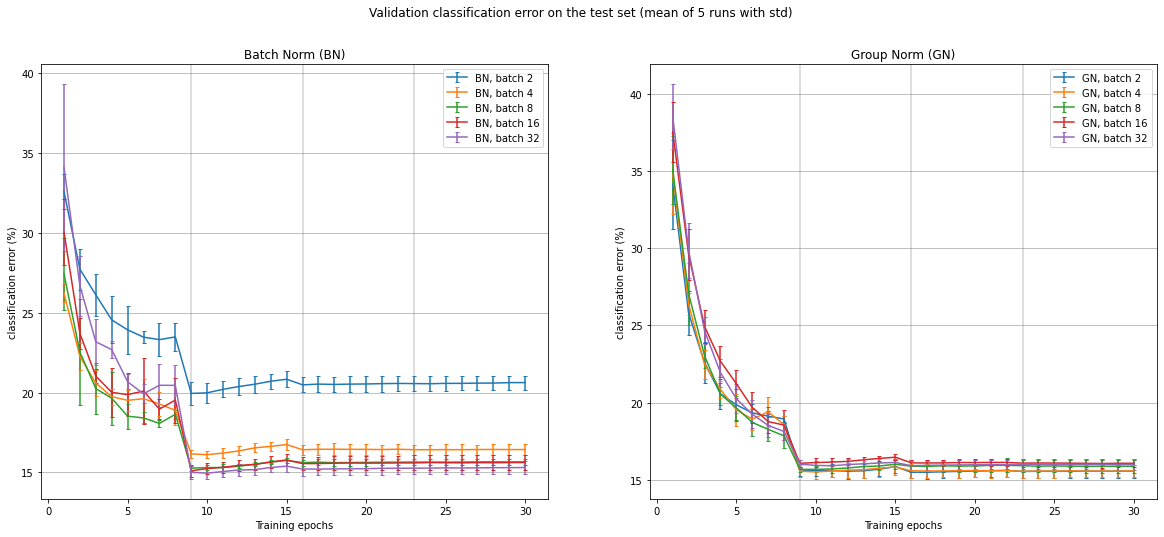

In [2]:
plot_validation_comparisson()

The grey vertical lines represent $lr$ decay.

# Reproduction of Figure 1

### GN vs BN as median over 5 runs of the best checkpoints. 
Takes longer since each model is loaded and evaluated ($\text{norm} \times \text{batch sizes} \times \text{runs} = 2 \times 5 \times 5 = 50$ models)


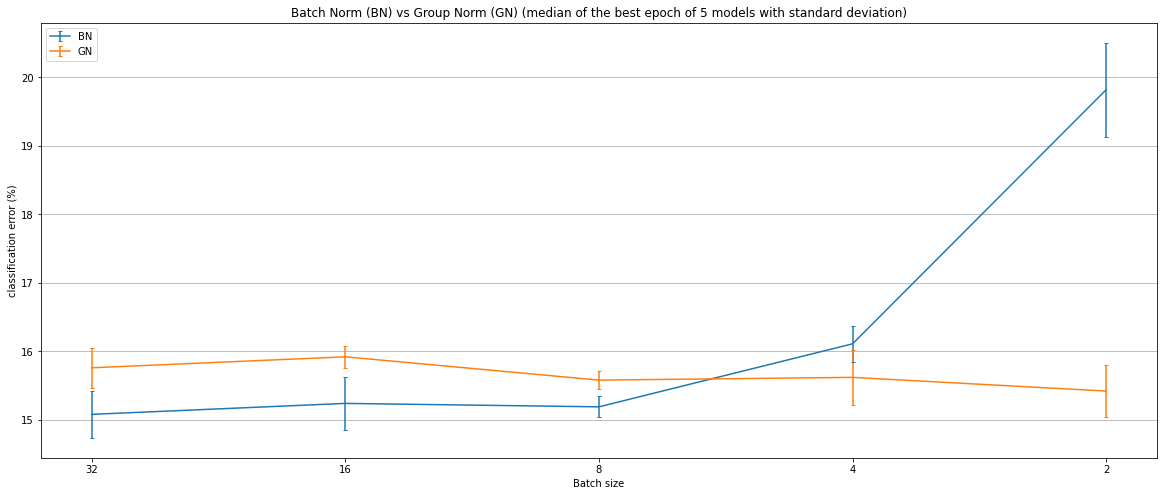

In [3]:
# I made a slight change to the order in which the class builds the layers in the middle of training and therefore the loading of the models requieres some parameters to be set per hand. 
# If wanting to visualize only newly created model set only_new to true.
GN_vs_BN_best_epoch(only_new=False) 

### GN vs BN as median over 5 runs of the last epoch. Taken from the logged training validation classification error (logged to csv)

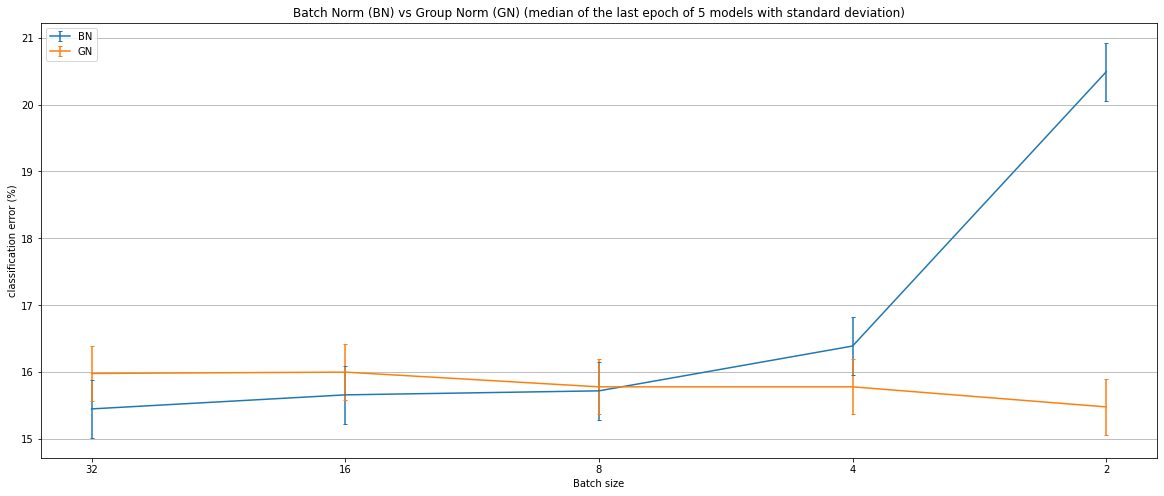

In [4]:
GN_vs_BN_last_epoch()